In [1]:
#!pip install --upgrade oct2py
import numpy as np
from oct2py import octave
import matplotlib.pyplot as plt
import os
from scipy.optimize import root
import math

`DyPy` is a class that we create and store in a file called `MyPy.py`. It contains methods for 

* converting data from a Dynare stucture to Numpy arrays.
* analyzing the data. 

See the file for details. 

In [2]:
from MyPy import DyPy

Creates a file called `t_call.m`. This informs Dynare of the format we want for output. It is put here so that adjusments can be made easily; for example the number of periods can be changed here rather than by looking at the `.mod` file. It is included in the `.mod` file via: `@#include "t_call.m"` in `model_1.mod`

* `order`: the order of approximation for the stochastic simulation. order=1 is a fsrst-order approximation (linearization) Higher-order approximations (e.g., order=2 for second-order) capture nonlinear effects in the model, but they require more computational resources.
* `periods`: number of periods (time steps) for which the simulation will be run. periods=1000 means that the model will be simulated for 1000 periods. The default value is 0, which means no simulation will be performed.
* `nograph`: suppresses the graphical output of the simulation results in Dynare since we draw them separatetly. 
* `irf`: the number of periods for which the impulse response functions (IRFs) will be computed and plotted. 

In [3]:
with open('t_call.m', 'w') as file:
    file.write("stoch_simul(nograph, order=1, periods=1000, irf=30);")

 `make_model.ipyn` writes a file called `t_model.m`. `t_model.m`is the `model` block in the Dynare `.mod` file. It can instead be created directlty by commenting out the next `%run` line and coding the model. `make_model.ipyn` simplifies model creation when many of the lines are very similar to each other. Then they can be written in for loops. For the model we are currently working with, there is not much advantage to writing the file via `make_model` but I have done so nonetheless. 
 
 The created file is included in the `.mod` file via `@#include "t_model.m"` in `model_1.mod`. 

In [4]:
%run make_model.ipynb

`make_files.ipynb` writes the other Dynare blocks. See that file for details. However, note that in doing so, it solves for the steady state of the model using `root` from `scipy`. If the results below do not indicate success, the `.mod` file may not run correctly. Also, note that though we solve for the steady state here, we do not give Dynare the steady state but rather use these as starting values for their ss solver. I will later code a verification the steady states are the same. 

In [5]:
%run make_files.ipynb

eps,tht,alf,bet,om_0,om_1,om_2,delt,a_0,a_1,a_2
eps,tht,alf,bet,om_0,om_1,om_2,delt,var_a_0,var_a_1,var_a_2,rho_a_0,rho_a_1,rho_a_2
0.32349525134451945 0.35300949731094583
 message: The solution converged.
 success: True
  status: 1
     fun: [-1.668e-13 -2.267e-13 -4.574e-14]
       x: [ 7.378e-01 -8.731e-02 -2.441e+00]
    nfev: 61
    fjac: [[-6.469e-02 -9.929e-01 -1.002e-01]
           [ 9.943e-01 -7.270e-02  7.842e-02]
           [ 8.515e-02  9.457e-02 -9.919e-01]]
       r: [-1.441e+00  6.657e-01  4.800e-02 -1.226e+00 -7.442e-02
            8.227e-02]
     qtf: [-1.005e-09  6.058e-10 -4.041e-11]


Tells octave where to find the .m file it will run. The file is `call_dynare`. Set to wherever you have this file. 




In [6]:
#a=octave.addpath(os.path.expanduser('C:/Users/blankenw/GitHub/dynare_progs/np_1'))

If you see the following error message:    
`warning: function C:\dynare\6.1\matlab\+identification\display.m shadows a built-in function`
it can be ignored

Makes a call to Octave, which makes a call to Dynare. Then the `.mod` file is run in Dynare. Output from Dynare is displayed as it runs.

In [7]:
y=1
x=octave.call_dynare(y,nout=1)



    call_dynare at line 4 column 4
    _pyeval at line 57 column 30

    call_dynare at line 4 column 4
    _pyeval at line 57 column 30

Starting Dynare (version 6.1).
Calling Dynare with arguments: none
Starting preprocessing of the model file ...
Found 10 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
4 block(s) found:
  3 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 7 equation(s)
                                 and 7 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 7 equation(s)
                                 and 7 feedback variable(s).
Preprocessing completed.
Preprocessing time: 0h00m01s

Dynare creates a `structure` which we will need so we `pull` it.

The output from Dynare is stored in a file called `oo_`. This brings `oo_` in as `oo`.

In [8]:
oo = octave.pull('oo_') 
type(oo)

    _pyeval at line 28 column 9

    _pyeval at line 28 column 9



oct2py.io.Struct

Create an instance of DyPy.

In [9]:
t1 = DyPy(oo)


Draw all impulse response functions. 

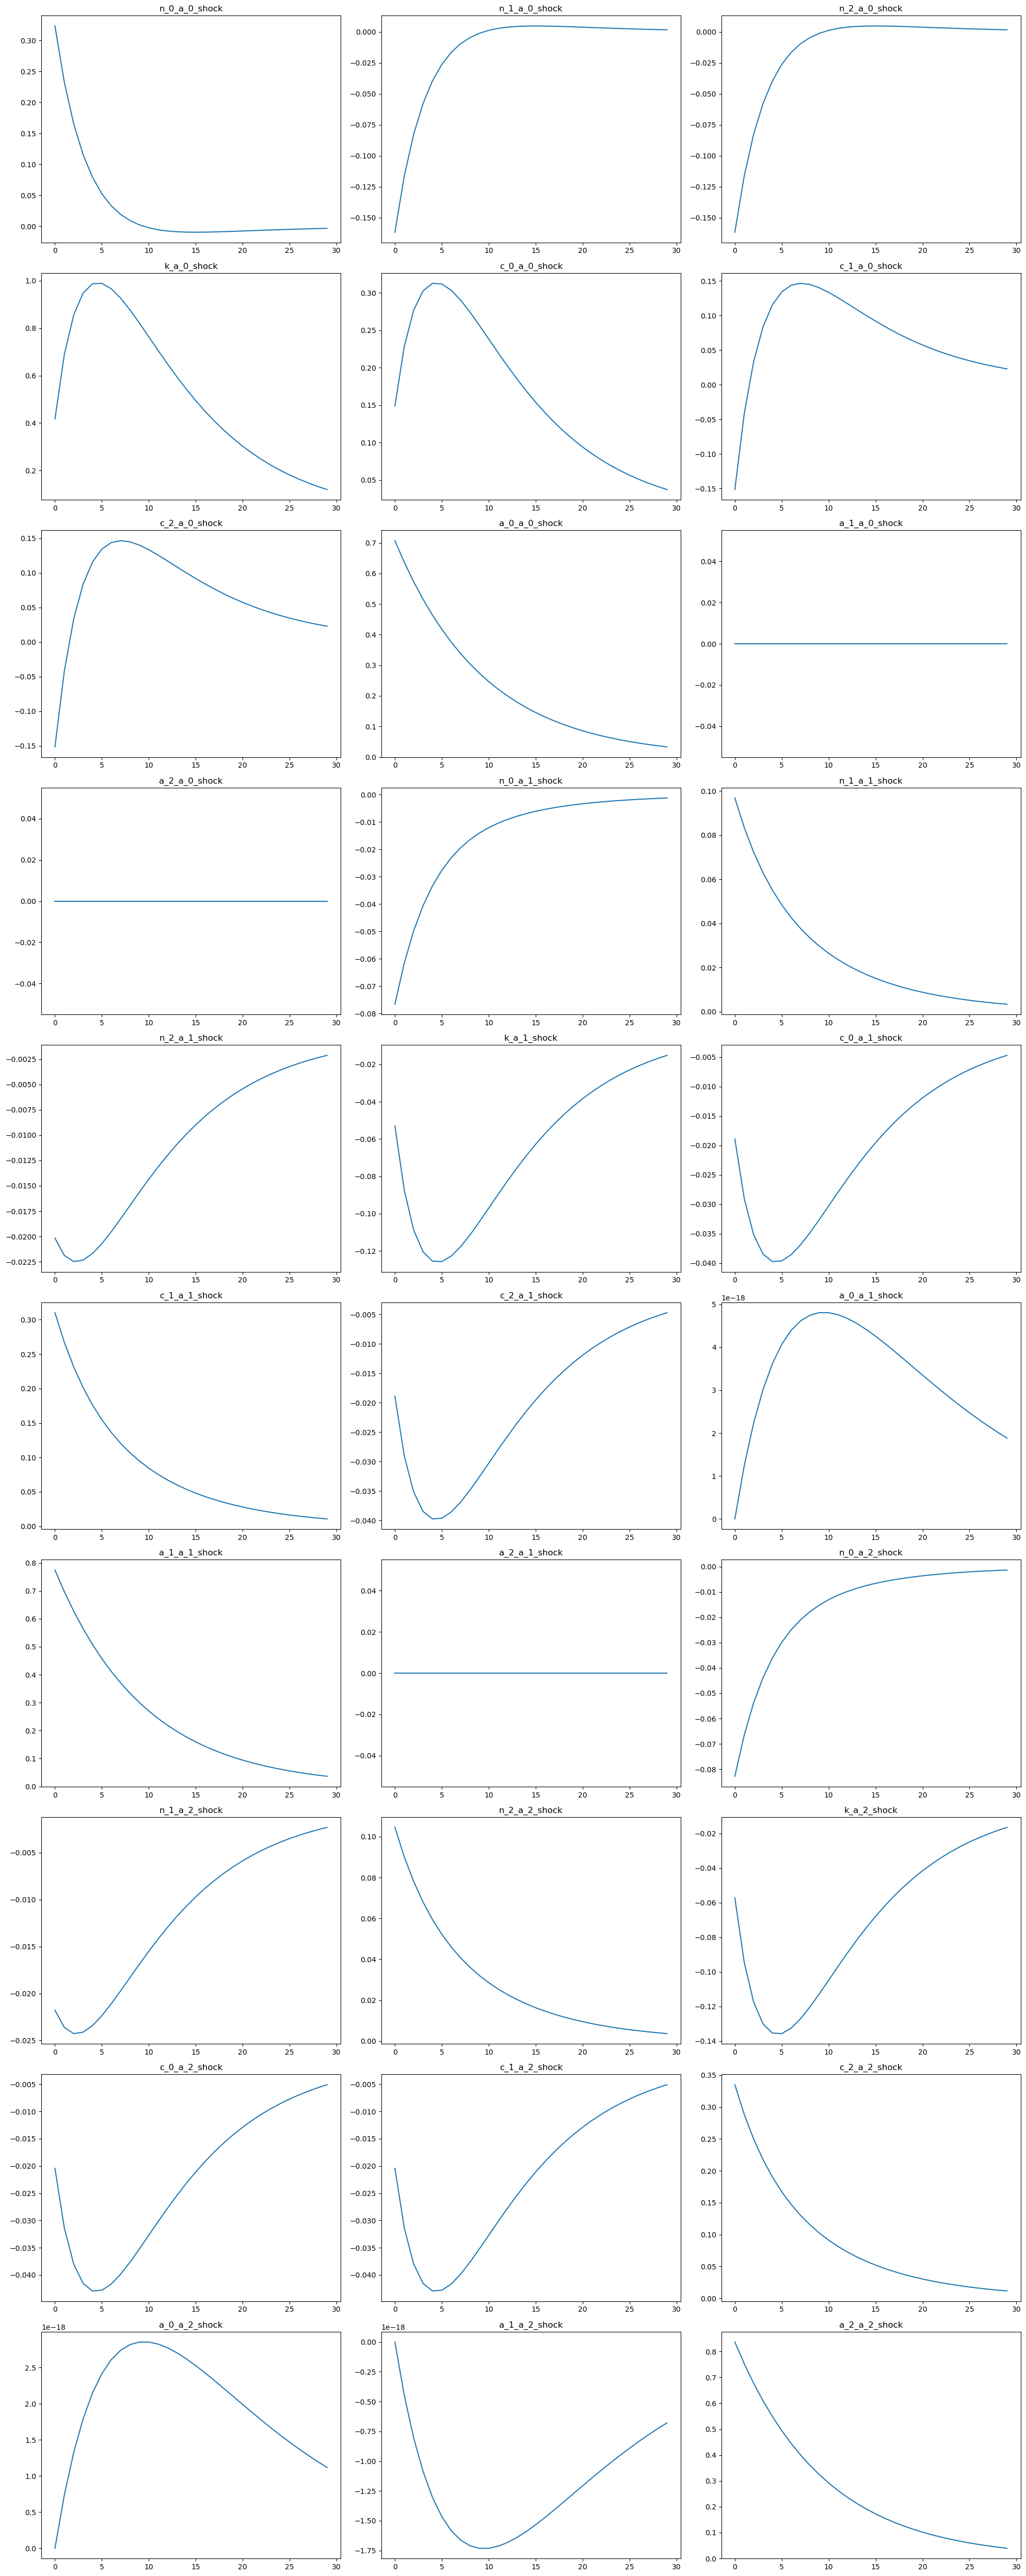

In [10]:
for shock in {key[-1] for key in t1.dict_irfs.keys()}:
    t1.plot_irfs(shock,cols=3)

The rest of this just gives insights regarding the 'oo' object. 

In [11]:
print(type(oo))
print(oo.keys())
print(oo['irfs'].keys())
print(type(oo['n_0_a_0_shock']))
oo['n_0_a_0_shock']

<class 'oct2py.io.Struct'>
dict_keys(['dynare_version', 'exo_simul', 'endo_simul', 'dr', 'exo_steady_state', 'exo_det_steady_state', 'exo_det_simul', 'initval_series', 'initial_steady_state', 'initial_exo_steady_state', 'gui', 'steady_state', 'var_list', 'mean', 'var', 'skewness', 'kurtosis', 'autocorr', 'variance_decomposition', 'irfs', 'time'])
dict_keys(['n_0_a_0_shock', 'n_1_a_0_shock', 'n_2_a_0_shock', 'k_a_0_shock', 'c_0_a_0_shock', 'c_1_a_0_shock', 'c_2_a_0_shock', 'a_0_a_0_shock', 'a_1_a_0_shock', 'a_2_a_0_shock', 'n_0_a_1_shock', 'n_1_a_1_shock', 'n_2_a_1_shock', 'k_a_1_shock', 'c_0_a_1_shock', 'c_1_a_1_shock', 'c_2_a_1_shock', 'a_0_a_1_shock', 'a_1_a_1_shock', 'a_2_a_1_shock', 'n_0_a_2_shock', 'n_1_a_2_shock', 'n_2_a_2_shock', 'k_a_2_shock', 'c_0_a_2_shock', 'c_1_a_2_shock', 'c_2_a_2_shock', 'a_0_a_2_shock', 'a_1_a_2_shock', 'a_2_a_2_shock'])
<class 'oct2py.io.Struct'>


{}

Gives a list of all the vaues that are numpy arrays and lists in dictionary `oo`.

In [12]:
numpy_keys = [key for key, value in oo.items() if isinstance(value, np.ndarray)]
list_keys = [key for key, value in oo.items() if isinstance(value, list)]
print(numpy_keys)
print(list_keys)

['exo_simul', 'endo_simul', 'exo_steady_state', 'steady_state', 'var_list', 'mean', 'var', 'skewness', 'kurtosis', 'autocorr', 'variance_decomposition']
['exo_det_steady_state', 'exo_det_simul', 'initial_steady_state', 'initial_exo_steady_state']


In [13]:
type(t1.oo_dict)

dict

In [14]:
key_type_list = [(key, type(value)) for key, value in oo.items()]
print(key_type_list)
key_type_list = [(key, type(value)) for key, value in t1.oo_dict.items()]
print(key_type_list)

[('dynare_version', <class 'str'>), ('exo_simul', <class 'numpy.ndarray'>), ('endo_simul', <class 'numpy.ndarray'>), ('dr', <class 'oct2py.io.Struct'>), ('exo_steady_state', <class 'numpy.ndarray'>), ('exo_det_steady_state', <class 'list'>), ('exo_det_simul', <class 'list'>), ('initval_series', <class 'oct2py.dynamic.dseries'>), ('initial_steady_state', <class 'list'>), ('initial_exo_steady_state', <class 'list'>), ('gui', <class 'oct2py.io.Struct'>), ('steady_state', <class 'numpy.ndarray'>), ('var_list', <class 'oct2py.io.Cell'>), ('mean', <class 'numpy.ndarray'>), ('var', <class 'numpy.ndarray'>), ('skewness', <class 'numpy.ndarray'>), ('kurtosis', <class 'numpy.ndarray'>), ('autocorr', <class 'oct2py.io.Cell'>), ('variance_decomposition', <class 'numpy.ndarray'>), ('irfs', <class 'oct2py.io.Struct'>), ('time', <class 'float'>), ('n_0_a_0_shock', <class 'oct2py.io.Struct'>)]
[('dynare_version', <class 'numpy.ndarray'>), ('exo_simul', <class 'numpy.ndarray'>), ('endo_simul', <class '

In [15]:
attributes = [attr for attr in dir(t1) if not attr.startswith('__')]
for attr in attributes:
    print(attr)

autocorr
dict_irfs
dr
dynare_version
endo_simul
exo_det_simul
exo_det_steady_state
exo_simul
exo_steady_state
gui
initial_exo_steady_state
initial_steady_state
initval_series
ir_a_0_a_0_shock
ir_a_0_a_1_shock
ir_a_0_a_2_shock
ir_a_1_a_0_shock
ir_a_1_a_1_shock
ir_a_1_a_2_shock
ir_a_2_a_0_shock
ir_a_2_a_1_shock
ir_a_2_a_2_shock
ir_c_0_a_0_shock
ir_c_0_a_1_shock
ir_c_0_a_2_shock
ir_c_1_a_0_shock
ir_c_1_a_1_shock
ir_c_1_a_2_shock
ir_c_2_a_0_shock
ir_c_2_a_1_shock
ir_c_2_a_2_shock
ir_k_a_0_shock
ir_k_a_1_shock
ir_k_a_2_shock
ir_n_0_a_0_shock
ir_n_0_a_1_shock
ir_n_0_a_2_shock
ir_n_1_a_0_shock
ir_n_1_a_1_shock
ir_n_1_a_2_shock
ir_n_2_a_0_shock
ir_n_2_a_1_shock
ir_n_2_a_2_shock
irfs
kurtosis
list_irfs
mean
oo_dict
plot_irfs
skewness
steady_state
time
var
var_list
variance_decomposition


In [16]:
t1.steady_state

array([[0.39583333],
       [0.30208333],
       [0.30208333],
       [0.87890625],
       [0.28320312],
       [0.28320312],
       [0.28320313],
       [0.        ],
       [0.        ],
       [0.        ]])

In [17]:
t1.steady_state

array([[0.39583333],
       [0.30208333],
       [0.30208333],
       [0.87890625],
       [0.28320312],
       [0.28320312],
       [0.28320313],
       [0.        ],
       [0.        ],
       [0.        ]])

In [18]:
oo

{'dynare_version': '6.1',
 'exo_simul': array([[-0.86609021,  0.59166607, -0.35057998],
        [ 0.35681967,  0.44727218,  0.452588  ],
        [-0.42576418, -0.03291294,  0.15384842],
        ...,
        [-0.15711054,  0.60395808,  0.86787276],
        [ 0.73162923,  0.72078754, -1.07126767],
        [-0.44071371,  0.65606562,  0.07512341]]),
 'endo_simul': array([[-0.02403525,  0.16595946,  0.01706616, ...,  0.29683803,
          0.69077663,  0.3347376 ],
        [ 0.58317683,  0.4806621 ,  0.5346402 , ...,  0.21360139,
          0.16576755,  0.38654472],
        [ 0.44085842,  0.35337844,  0.44829365, ...,  0.48956058,
          0.14345582,  0.27871768],
        ...,
        [-0.86609021, -0.42266153, -0.80615955, ..., -0.42771525,
          0.34668551, -0.12869675],
        [ 0.59166607,  0.97977165,  0.84888155, ..., -0.28068402,
          0.46817193,  1.07742035],
        [-0.35057998,  0.13706601,  0.27720784, ...,  1.54635616,
          0.32045287,  0.363531  ]]),
 'dr': {'ks